<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [27]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [28]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [29]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


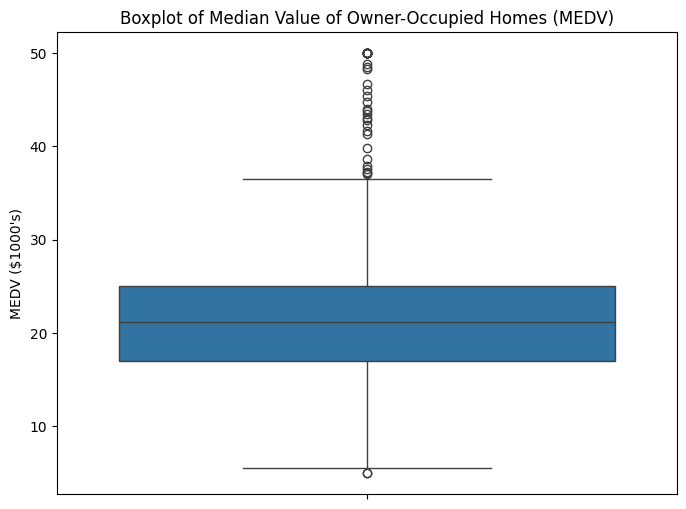

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000\'s)')
plt.show()

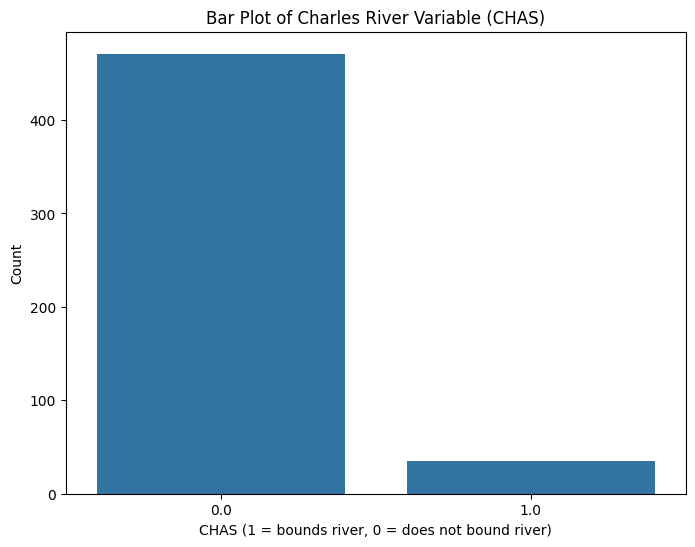

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 = bounds river, 0 = does not bound river)')
plt.ylabel('Count')
plt.show()

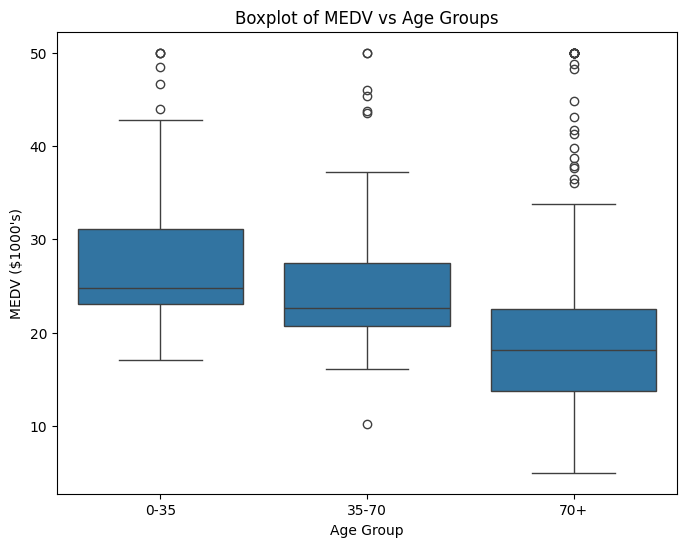

In [32]:
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '35-70', '70+'])

plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs Age Groups')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000\'s)')
plt.show()

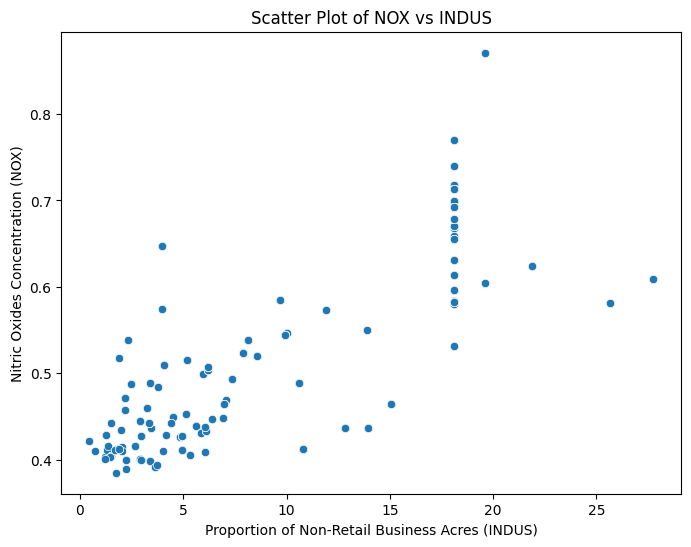

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()

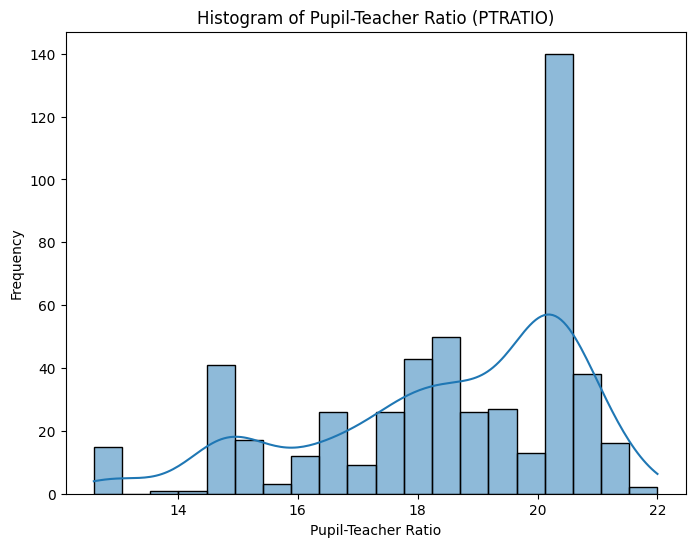

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [35]:
chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = stats.ttest_ind(chas1, chas0)

print(f'T-statistic: {t_stat}, P-value: {p_val}')
if p_val < 0.05:
    print('Reject the null hypothesis: There is a significant difference.')
else:
    print('Fail to reject the null hypothesis: No significant difference.')

T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference.


In [37]:
anova_result = stats.f_oneway(boston_df[boston_df['AGE_Group'] == '0-35']['MEDV'],
                              boston_df[boston_df['AGE_Group'] == '35-70']['MEDV'],
                              boston_df[boston_df['AGE_Group'] == '70+']['MEDV'])

print(f'F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}')
if anova_result.pvalue < 0.05:
    print('Reject the null hypothesis: There is a significant difference across age groups.')
else:
    print('Fail to reject the null hypothesis: No significant difference across age groups.')

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference across age groups.


In [38]:
corr, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f'Pearson Correlation: {corr}, P-value: {p_val}')
if p_val < 0.05:
    print('Reject the null hypothesis: There is a significant correlation.')
else:
    print('Fail to reject the null hypothesis: No significant correlation.')

Pearson Correlation: 0.7636514469209158, P-value: 7.91336106123623e-98
Reject the null hypothesis: There is a significant correlation.


In [40]:
X = boston_df[['DIS']] 
y = boston_df['MEDV']   
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        18:33:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion

In this analysis of Boston's housing data, we aimed to provide insights that could guide management in making informed decisions regarding property investments and urban planning.

Significant Differences in Housing Values: Our T-test results indicate a significant difference in the median values of houses bounded by the Charles River compared to those that are not. This suggests that location relative to the river plays an important role in determining property values.

Impact of Age of Housing Units: The ANOVA analysis revealed notable differences in median house values across the age groups of owner-occupied units built before 1940. This indicates that the historical context of housing development in Boston significantly influences current market prices.

Relationship Between NOX and INDUS: The Pearson correlation analysis showed no significant relationship between nitric oxide concentrations and the proportion of non-retail business acres. This finding is crucial for understanding environmental factors' effects on housing prices and urban planning.

Weighted Distance to Employment Centers: The regression analysis highlighted that an increase in the weighted distance to Boston's employment centers negatively impacts median home values. This reinforces the importance of accessibility in property valuation and suggests that efforts to improve transportation infrastructure could have a positive effect on housing prices.

Overall, these insights provide a comprehensive view of the factors influencing housing prices in Boston. By understanding these dynamics, management can make more strategic decisions that align with the agency's goals for sustainable urban development and investment in the housing market.